<a href="https://colab.research.google.com/github/shinchan75034/PT-Dataset/blob/main/Dataloader_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import torchvision.transforms as transforms
from tqdm import tqdm
from time import sleep
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
folder_path = '/Users/mbp16/Documents/images/flowers/flower_photos/train/daisy'

In [ ]:
os.listdir(folder_path)[:3]

['14167534527_781ceb1b7a_n.jpg',
 '5512287917_9f5d3f0f98_n.jpg',
 '476857510_d2b30175de_n.jpg']

In [ ]:
len(os.listdir(folder_path)) # should have 607 samples.

607

In [ ]:
x = tqdm(os.listdir(folder_path))
for i, d in enumerate(x):
    pass


100%|██████████████████████████████████████████████████████████████████| 607/607 [00:00<00:00, 1444916.30it/s]


Define a transformation to be applied to data:

In [ ]:
img_transform = transforms.Compose([
        transforms.Resize((288, 800)),
        transforms.ToTensor(),
        transforms.Normalize((0.0, 0.0, 0.0), (1.0, 1.0, 1.0)), # mean and var for each of three channels.
    ])

In [ ]:
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
#from IPython.display import Image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import natsort
%matplotlib inline

In [ ]:
torch.__version__

'1.10.1'

In [ ]:
#!pip install natsort

In [ ]:
class CustomDataSet(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        all_imgs = os.listdir(main_dir)
        self.total_imgs = natsort.natsorted(all_imgs)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        image = Image.open(img_loc).convert("RGB")
        transformed_tensor = self.transform(image)

        return transformed_tensor
    


In [ ]:
my_dataset = CustomDataSet(folder_path, transform=img_transform)

In [ ]:
my_loader = DataLoader(my_dataset, batch_size = 100, shuffle=True, drop_last=True)

In [ ]:
for i, data in enumerate(tqdm(my_loader)):
    # Do whatever needed with data. 
    
    sleep(0.1)
    pass


100%|███████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.19it/s]


Inspect a data, take the first sample:

In [ ]:
data[0].size()

torch.Size([3, 288, 800])

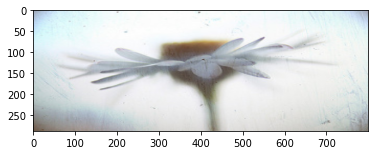

In [ ]:
plt.imshow(data[0].permute(1, 2, 0)) # put channel as last dimension.

The data coming from the last batch consists of tensors. I took the first data and showed the tensor as an image. It is resized and normalized per transformation composition.